# Clustering Methord - k_means

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Forming the data set

In [2]:
np.random.seed(42)

In [3]:
income = np.random.randint(15, 150, size=200)
spending_score = np.random.randint(1, 100, size=200)
data = pd.DataFrame({'Annual Income': income, 'Spending Score': spending_score})

# Scaling the Model

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [7]:
inertia = []  # To store the within-cluster sum of squares for each k
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

c:\Users\abhin\anaconda3\envs\Jupiter\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abhin\anaconda3\envs\Jupiter\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abhin\anaconda3\envs\Jupiter\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abhin\anaconda3\envs\Jupiter\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

# PLottng the ELBOW Curve

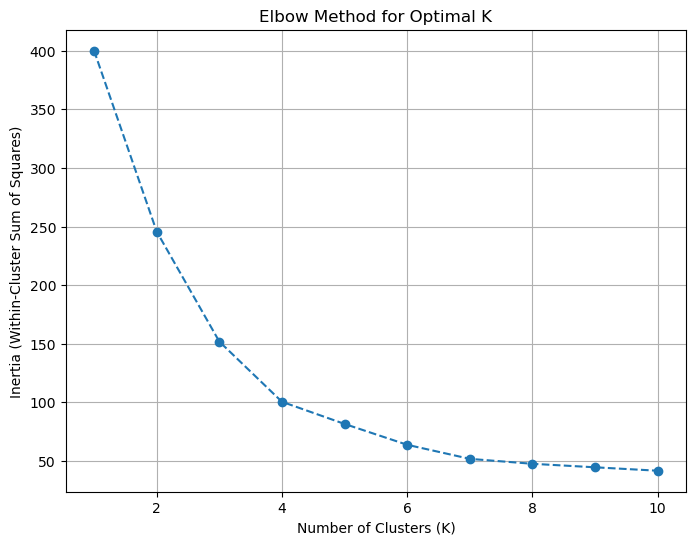

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

# Training the K-Means model with optimal K

In [9]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

c:\Users\abhin\anaconda3\envs\Jupiter\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Plotting the Centroides

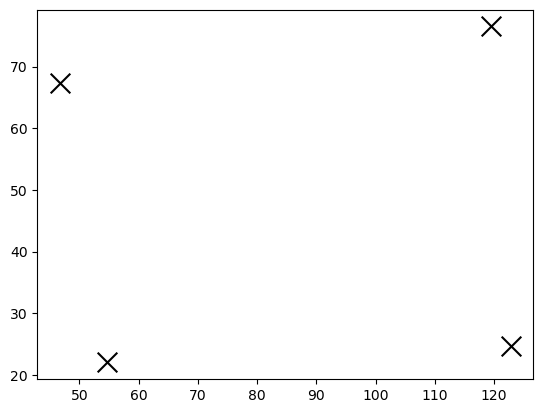

In [10]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label="Centroids")

C:\Users\abhin\AppData\Local\Temp\ipykernel_18480\2267295183.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


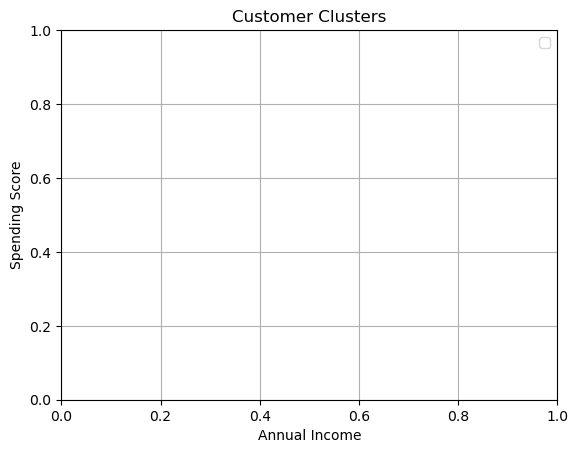

In [11]:
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Clusters")
plt.legend()
plt.grid()
plt.show()